## Bu projede yfinance kulanılarak time series analizi yapıılacak

### import libraries

In [52]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sbn
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [3]:
today = date.today()

In [5]:
end = today.strftime('%Y-%m-%d')
start = today - timedelta(days = 360)
start = start.strftime('%Y-%m-%d')
ticker = 'AAPL'

In [6]:
data = yf.download(ticker, start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908463,98964500
2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105331,71051600
2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719742,73353800
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300
2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700


In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-16,186.729996,186.990005,184.270004,184.919998,184.919998,101235600
2023-06-20,184.410004,186.100006,184.410004,185.009995,185.009995,49799100
2023-06-21,184.899994,185.410004,182.589996,183.960007,183.960007,49515700
2023-06-22,183.740005,187.050003,183.669998,187.000000,187.000000,51245300
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.679993,53079300


In [8]:
data.shape

(247, 6)

### tarih sutununu duzenleyelim

In [10]:
data['Date'] = data.index

In [11]:
data

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908463,98964500,2022-06-30
2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105331,71051600,2022-07-01
2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719742,73353800,2022-07-05
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300,2022-07-06
2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700,2022-07-07
...,...,...,...,...,...,...,...
2023-06-16,186.729996,186.990005,184.270004,184.919998,184.919998,101235600,2023-06-16
2023-06-20,184.410004,186.100006,184.410004,185.009995,185.009995,49799100,2023-06-20
2023-06-21,184.899994,185.410004,182.589996,183.960007,183.960007,49515700,2023-06-21


In [12]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date'], dtype='object')

In [13]:
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-06-30,2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908463,98964500
2022-07-01,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105331,71051600
2022-07-05,2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719742,73353800
2022-07-06,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300
2022-07-07,2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700


In [15]:
data.reset_index(drop = True, inplace = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
242,2023-06-16,186.729996,186.990005,184.270004,184.919998,184.919998,101235600
243,2023-06-20,184.410004,186.100006,184.410004,185.009995,185.009995,49799100
244,2023-06-21,184.899994,185.410004,182.589996,183.960007,183.960007,49515700
245,2023-06-22,183.740005,187.050003,183.669998,187.000000,187.000000,51245300
246,2023-06-23,185.550003,187.559998,185.009995,186.679993,186.679993,53079300


### plotting

In [24]:
figure = px.line(data, x = 'Date', y = 'High', title = 'High values over the years')
figure.show()

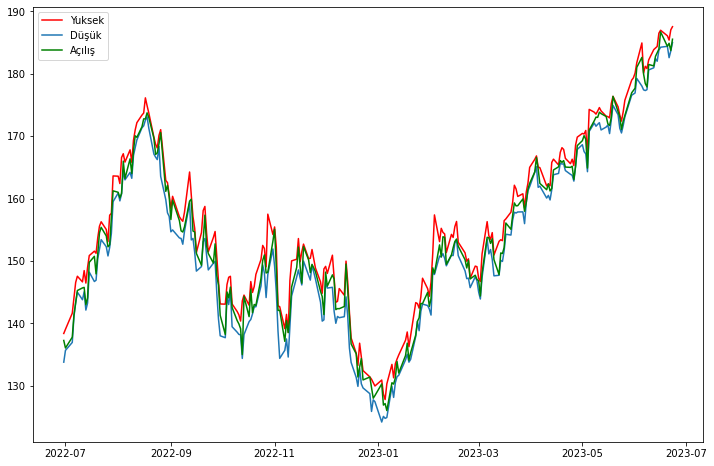

In [36]:
plt.figure(figsize = (12, 8))
plt.plot(data['Date'], data['High'], 'red', label = 'Yuksek')
plt.plot(data['Date'], data['Low'], label = 'Düşük')
plt.plot(data['Date'], data['Open'], 'green', label = 'Açılış')
plt.legend()
plt.show()

In [41]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908463,98964500,2022,6
1,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105331,71051600,2022,7
2,2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719742,73353800,2022,7
3,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300,2022,7
4,2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700,2022,7


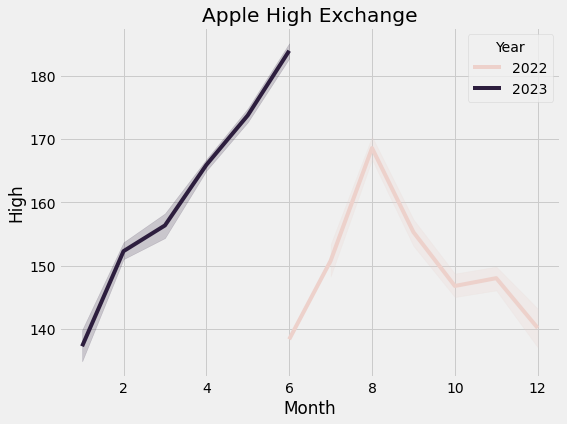

In [49]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 6))
plt.title("Apple High Exchange")
sbn.lineplot(data = data, x = 'Month', y = 'High', hue = 'Year')
plt.show()

In [51]:
forecast_data = data.rename(columns = {"Date" : "ds", "Open" : "y"})
forecast_data

,ds,y,High,Low,Close,Adj Close,Volume,Year,Month
0,2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908463,98964500,2022,6
1,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105331,71051600,2022,7
2,2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719742,73353800,2022,7
3,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300,2022,7
4,2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700,2022,7
...,...,...,...,...,...,...,...,...,...
242,2023-06-16,186.729996,186.990005,184.270004,184.919998,184.919998,101235600,2023,6
243,2023-06-20,184.410004,186.100006,184.410004,185.009995,185.009995,49799100,2023,6
244,2023-06-21,184.899994,185.410004,182.589996,183.960007,183.960007,49515700,2023,6
245,2023-06-22,183.740005,187.050003,183.669998,187.000000,187.000000,51245300,2023,6


In [53]:
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods = 365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions, )

15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] done processing
